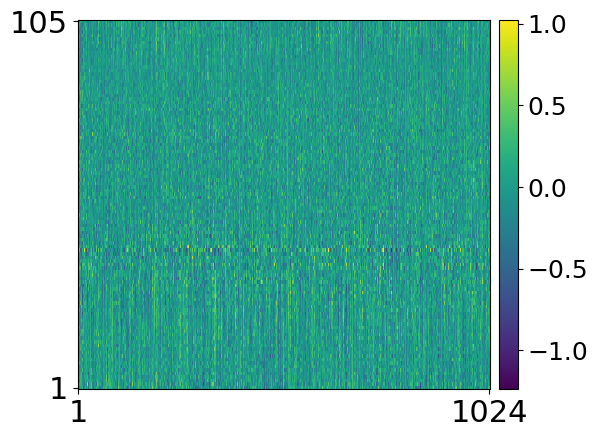

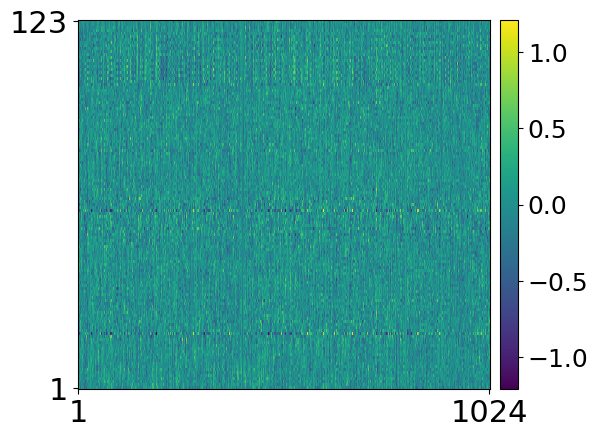

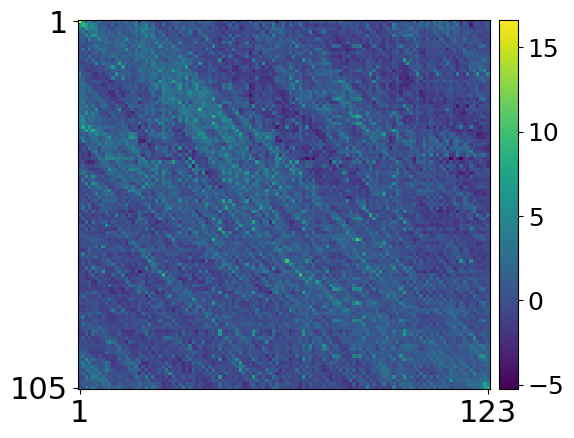

In [3]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plmalign.util import dot_product, embedding_cos_similarity

# Load the data
seq1_emb = torch.load('data/scope40_test/input/prottrans_embedding/d2crua1.pt')
seq2_emb = torch.load('data/scope40_test/input/prottrans_embedding/d1pwaa_.pt')

x1 = np.arange(-0.5, seq1_emb.shape[1], 1)
y1 = np.arange(-0.5, seq1_emb.shape[0], 1)

x2 = np.arange(-0.5, seq1_emb.shape[1], 1)
y2 = np.arange(-0.5, seq2_emb.shape[0], 1)

# Embedding1
fig1, ax1 = plt.subplots()
c1 = ax1.pcolormesh(x1, y1, seq1_emb, cmap='viridis')
cbar = fig1.colorbar(c1, ax=ax1, pad=0.02)  # Add colorbar
cbar.ax.tick_params(labelsize=18)  # Change label size on colorbar
ax1.set_xticks([0, seq1_emb.shape[1]-1])
ax1.set_yticks([0, seq1_emb.shape[0]-1])
ax1.set_xticklabels([1, seq1_emb.shape[1]], fontsize=22)  # Label the ticks
ax1.set_yticklabels([1, seq1_emb.shape[0]], fontsize=22)

# Embedding2
fig2, ax2 = plt.subplots()
c2 = ax2.pcolormesh(x2, y2, seq2_emb, cmap='viridis')
cbar = fig2.colorbar(c2, ax=ax2, pad=0.02)  # Add colorbar
cbar.ax.tick_params(labelsize=18)  # Change label size on colorbar
ax2.set_xticks([0, seq2_emb.shape[1]-1])
ax2.set_yticks([0, seq2_emb.shape[0]-1])
ax2.set_xticklabels([1, seq2_emb.shape[1]], fontsize=22)  # Label the ticks
ax2.set_yticklabels([1, seq2_emb.shape[0]], fontsize=22)

# Compute the dot product
densitymap = dot_product(seq1_emb.numpy(), seq2_emb.numpy())

x3 = np.arange(-0.5, densitymap.shape[1], 1)
y3 = np.arange(-0.5, densitymap.shape[0], 1)

fig3, ax3 = plt.subplots()
c3 = ax3.pcolormesh(x3, y3, densitymap, cmap='viridis')
cbar = fig3.colorbar(c3, ax=ax3, pad=0.02)  # Add colorbar
cbar.ax.tick_params(labelsize=18)  # Change label size on colorbar

ax3.invert_yaxis()
ax3.set_xticks([0, densitymap.shape[1]-1])
ax3.set_yticks([0, densitymap.shape[0]-1])
ax3.set_xticklabels([1, densitymap.shape[1]], fontsize=22)  # Label the ticks
ax3.set_yticklabels([1, densitymap.shape[0]], fontsize=22)

plt.show()

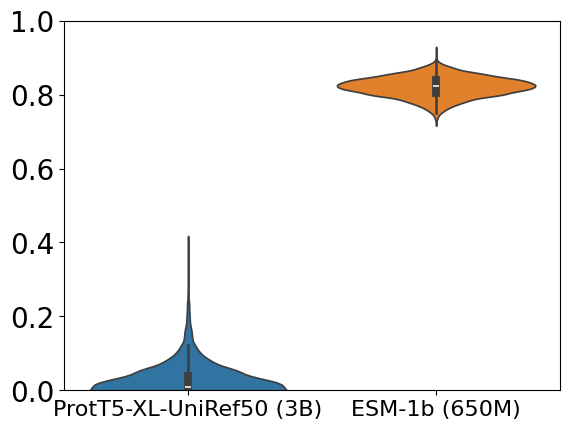

In [4]:
df_dict = {}
df_dict["cos_similarity"] = []
df_dict["method"] = []

seq1_emb = torch.load('data/scope40_test/input/prottrans_embedding/d2crua1.pt')
seq2_emb = torch.load('data/scope40_test/input/prottrans_embedding/d1pwaa_.pt')
densitymap = embedding_cos_similarity(seq1_emb.numpy(), seq2_emb.numpy())
for element in densitymap.ravel().tolist():
    df_dict["cos_similarity"].append(element)
    df_dict["method"].append("ProtT5-XL-UniRef50 (3B)")

seq1_emb = torch.load('data/scope40_test/input/esm_embedding/d2crua1.pt')
seq2_emb = torch.load('data/scope40_test/input/esm_embedding/d1pwaa_.pt')
densitymap = embedding_cos_similarity(seq1_emb.numpy(), seq2_emb.numpy())
for element in densitymap.ravel().tolist():
    df_dict["cos_similarity"].append(element)
    df_dict["method"].append("ESM-1b (650M)")

ax = sns.violinplot(data=df_dict, x="method", y="cos_similarity", hue= "method")
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(fontsize=16)
plt.ylim(0,0.5)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
plt.show()
plt.close()

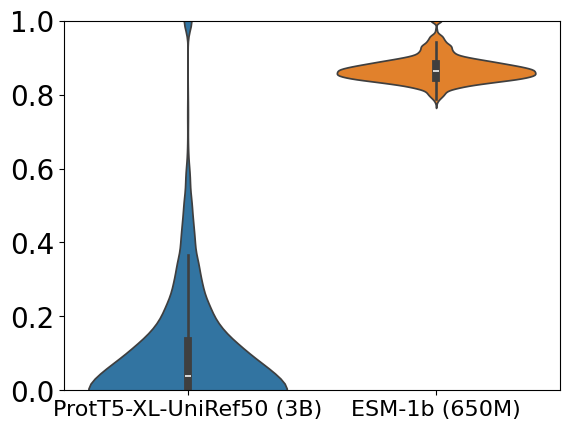

In [5]:
df_dict = {}
df_dict["cos_similarity"] = []
df_dict["method"] = []

seq1_emb = torch.load('data/scope40_test/input/prottrans_embedding/d2crua1.pt')
seq2_emb = torch.load('data/scope40_test/input/prottrans_embedding/d2crua1.pt')

densitymap = embedding_cos_similarity(seq1_emb.numpy(), seq2_emb.numpy())
for element in densitymap.ravel().tolist():
    df_dict["cos_similarity"].append(element)
    df_dict["method"].append("ProtT5-XL-UniRef50 (3B)")

seq1_emb = torch.load('data/scope40_test/input/esm_embedding/d2crua1.pt')
seq2_emb = torch.load('data/scope40_test/input/esm_embedding/d2crua1.pt')
densitymap = embedding_cos_similarity(seq1_emb.numpy(), seq2_emb.numpy())
for element in densitymap.ravel().tolist():
    df_dict["cos_similarity"].append(element)
    df_dict["method"].append("ESM-1b (650M)")

ax = sns.violinplot(data=df_dict, x="method", y="cos_similarity", hue= "method")
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(fontsize=16)
plt.ylim(0,0.5)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
plt.show()
plt.close()


In [1]:
import time
from plmalign.plmalign import plmalign_pipeline

query_fasta = 'data/scope40_test/input/protein.fasta'
target_fasta = 'data/scope40_test/input/protein.fasta'

query_embedding_path = 'data/scope40_test/input/prottrans_embedding'
target_embedding_path = 'data/scope40_test/input/prottrans_embedding'

# ########## PLMAlign (PLMSearch) ##########
time_start=time.time()

search_result_setting = ('data/scope40_test/input/search_result/plmsearch', 0.3)

output_path = 'data/scope40_test/output/scope40_plmalign_plmsearch/'

plmalign_pipeline(query_fasta, target_fasta, mode = 'global', query_embedding_path = query_embedding_path, target_embedding_path = target_embedding_path, search_result_setting = search_result_setting, output_path = output_path, if_stdout = False)

time_end=time.time()
print('PLMAlign (PLMSearch):', time_end-time_start, 's')

# ########## PLMAlign (SS-predictor) ##########
time_start=time.time()

search_result_setting = ('data/scope40_test/input/search_result/ss_predictor', 0.3)

output_path = 'data/scope40_test/output/scope40_plmalign_ss_predictor/'

plmalign_pipeline(query_fasta, target_fasta, mode = 'global', query_embedding_path = query_embedding_path, target_embedding_path = target_embedding_path, search_result_setting = search_result_setting, output_path = output_path, if_stdout = False)

time_end=time.time()
print('PLMAlign (SS-predictor):', time_end-time_start, 's')

# ########## PLMAlign (All) ##########
time_start=time.time()

output_path = 'data/scope40_test/output/scope40_plmalign_all/'

plmalign_pipeline(query_fasta, target_fasta, mode = 'global', query_embedding_path = query_embedding_path, target_embedding_path = target_embedding_path, output_path = output_path, if_stdout = False)

time_end=time.time()
print('PLMAlign (All):', time_end-time_start, 's')

/mnt/data/lw/plmalign/plmalign/plmalign_util/numeric.py:138: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(fastmath=True, cache=True)
/mnt/data/lw/plmalign/plmalign/plmblast_util/numeric.py:172: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(fastmath=True, cache=True)
/home/lw/anaconda3/envs/plmblast/lib/python3.9/site-packages/tqdm/auto.py:

Align with method: plmalign


Search result: 100%|██████████| 800221/800221 [13:20<00:00, 1000.09it/s]


PLMAlign (PLMSearch): 803.4853129386902 s
Align with method: plmalign


Search result: 100%|██████████| 4870849/4870849 [59:41<00:00, 1359.95it/s]  


PLMAlign (SS-predictor): 3586.901561498642 s
Align with method: plmalign


Query: 100%|██████████| 2207/2207 [3:27:42<00:00,  5.65s/it]  


PLMAlign (All): 12470.904791116714 s
